# SOLAR POWER DATASET
Using the above dataset to do time series forecasting.

## BUSINESS OBJECTIVE
* Maximize Savings
* Minimize Loss
* Minimize non renewable energy sources
* Maximize renewable energy sources
* Maximize Popularity

## CONSTRAINTS
* Initial setting cost
* Weather
* Low sun exposure


## DATA DICTIONARY

| **slno** | **Name of Feature** | **Description**                                                                                                          | **Type** | **Relevance** |
|:--------:|:-------------------|:--------------------------------------------------------------------------------------------------------------------------|:--------:|:-------------:|
| 1 | date | It gives the date in which the power was noted | Nominal   | Relevant      |
| 2 | cum_power | Daily Cumulative power consumption | Ratio   | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass28\solarpower_cumuldaybyday2.csv")
df=df0.copy()
df.head()

,date,cum_power
0,26/10/2011,0.1
1,27/10/2011,10.2
2,28/10/2011,20.2
3,29/10/2011,29.6
4,30/10/2011,34.2


### DATA UNDERSTANDING & PREPROCESSING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(2558, 2)

In [4]:
df.dtypes

date          object
cum_power    float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2558 non-null   object 
 1   cum_power  2558 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.1+ KB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,cum_power
count,2558.000000
mean,13461.057349
std,8129.192104
min,0.100000
25%,6665.350000
50%,13000.500000
75%,20183.750000
max,28120.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number and Percentage of Missing Values in the Dataset.

In [8]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 date         0
cum_power    0
dtype: int64


Converting the 'date' column from object datatype to datetime datatype. 

In [9]:
df['date']=pd.to_datetime(df['date'],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       2558 non-null   datetime64[ns]
 1   cum_power  2558 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.1 KB


Using the dt.day_name function from pandas to get the day name from the date variable and saving the names to newly created variable called dates

In [10]:
df['dates'] = df['date'].dt.day_name(locale='English')
df.head(5)

,date,cum_power,dates
0,2011-10-26,0.1,Wednesday
1,2011-10-27,10.2,Thursday
2,2011-10-28,20.2,Friday
3,2011-10-29,29.6,Saturday
4,2011-10-30,34.2,Sunday


Checking the number of unique values in each variable. 

In [11]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 date         2558
cum_power    2522
dates           7
dtype: int64


creating a column t for time index , t_square for squared time index & log_cum_power for building exponential model

In [12]:
df["t"] = np.arange(1,2559)
df["t_square"] = df["t"] * df["t"]
df["log_cum_power"] = np.log(df["cum_power"])
df.head(5)

,date,cum_power,dates,t,t_square,log_cum_power
0,2011-10-26,0.1,Wednesday,1,1,-2.302585
1,2011-10-27,10.2,Thursday,2,4,2.322388
2,2011-10-28,20.2,Friday,3,9,3.005683
3,2011-10-29,29.6,Saturday,4,16,3.387774
4,2011-10-30,34.2,Sunday,5,25,3.532226


Creating dummy variables of the months variable. 

In [13]:
week_dummies = pd.DataFrame(pd.get_dummies(df['dates']))
df1 = pd.concat([df, week_dummies], axis = 1)
df1.head(5)

,date,cum_power,dates,t,t_square,log_cum_power,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2011-10-26,0.1,Wednesday,1,1,-2.302585,0,0,0,0,0,0,1
1,2011-10-27,10.2,Thursday,2,4,2.322388,0,0,0,0,1,0,0
2,2011-10-28,20.2,Friday,3,9,3.005683,1,0,0,0,0,0,0
3,2011-10-29,29.6,Saturday,4,16,3.387774,0,0,1,0,0,0,0
4,2011-10-30,34.2,Sunday,5,25,3.532226,0,0,0,1,0,0,0


Creating a new dataframe which would be used to forecast the data for the next 1 Years(365 days). 

In [14]:
df_new = df1.iloc[5:370,:] 
df_new.drop(['date','cum_power','dates','t','t_square','log_cum_power'],axis=1,inplace=True)
df_new["t"] = np.arange(2559,2924)
df_new["t_square"] = df_new["t"] * df_new["t"]
df_new.reset_index(drop=True, inplace=True)
df_new.head()

C:\Users\lenny\AppData\Local\Temp\ipykernel_39136\3110733958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(['date','cum_power','dates','t','t_square','log_cum_power'],axis=1,inplace=True)
C:\Users\lenny\AppData\Local\Temp\ipykernel_39136\3110733958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["t"] = np.arange(2559,2924)
C:\Users\lenny\AppData\Local\Temp\ipykernel_39136\3110733958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,t,t_square
0,0,1,0,0,0,0,0,2559,6548481
1,0,0,0,0,0,1,0,2560,6553600
2,0,0,0,0,0,0,1,2561,6558721
3,0,0,0,0,1,0,0,2562,6563844
4,1,0,0,0,0,0,0,2563,6568969


### VISUALIZATION - TIME PLOT
Plotting the time plot. 

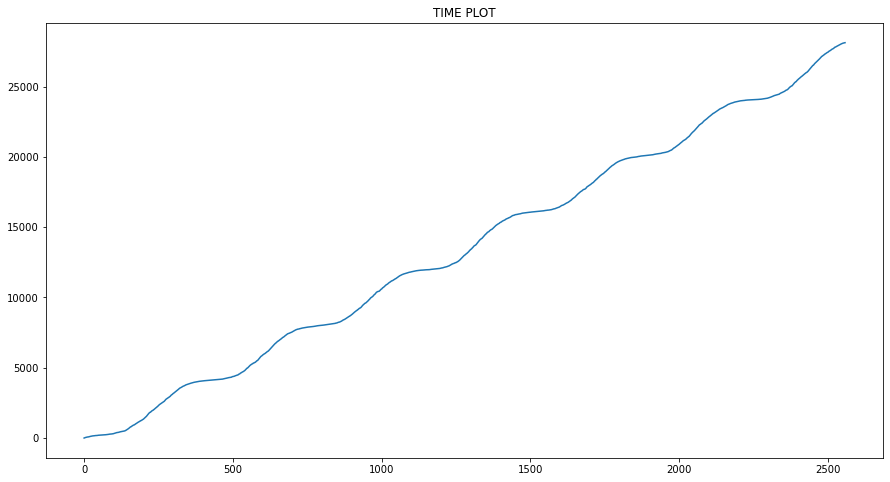

In [15]:
plt.figure(figsize=(15,8))
df1.cum_power.plot()
plt.title("TIME PLOT")
plt.show()

From the time plot we can see that it has an upwards trend but not sure if seasonality is present. 

### DATA PARTITION
Partioning the data into train and test data. 

In [16]:
Train = df1.head(2193)
Test = df1.tail(365)

### MODEL BUILDING

__TESTING DIFFERENT MODELS__

Importing the library required for building the model.

In [17]:
import statsmodels.formula.api as smf 

__Linear Model__

In [18]:
linear_model = smf.ols('cum_power ~ t', data = Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['cum_power']) - np.array(pred_linear))**2))
rmse_linear

441.2128945378352

__Exponential Model__

In [19]:
Exp = smf.ols('log_cum_power ~ t', data = Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['cum_power']) - np.array(np.exp(pred_Exp)))**2))
rmse_Exp

37012.42218981048

__Quadratic Model__

In [20]:
Quad = smf.ols('cum_power ~ t + t_square', data = Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t", "t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['cum_power']) - np.array(pred_Quad))**2))
rmse_Quad

465.4925167106908

__Additive Seasonality__

In [21]:
add_sea = smf.ols('cum_power ~ Monday+Tuesday+Wednesday+Thursday+Friday+Saturday+Sunday', data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday','Wednesday']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['cum_power']) - np.array(pred_add_sea))**2))
rmse_add_sea

14120.44591629301

__Multiplicative Seasonality__

In [22]:
Mul_sea = smf.ols('log_cum_power ~ Monday+Tuesday+Wednesday+Thursday+Friday+Saturday+Sunday',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['cum_power']) - np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

17884.43149320604

__Additive Seasonality with Linear Trend__

In [23]:
add_sea_lin = smf.ols('cum_power ~ t+Monday+Tuesday+Wednesday+Thursday+Friday+Saturday+Sunday',data=Train).fit()
pred_add_sea_lin = pd.Series(add_sea_lin.predict(Test[['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday','Wednesday','t']]))
rmse_add_sea_lin = np.sqrt(np.mean((np.array(Test['cum_power'])-np.array(pred_add_sea_lin))**2))
rmse_add_sea_lin 

441.212855877306

__Additive Seasonality with Quadratic Trend__

In [24]:
add_sea_Quad = smf.ols('cum_power ~ t+t_square+Monday+Tuesday+Wednesday+Thursday+Friday+Saturday+Sunday',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday','Wednesday','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['cum_power'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

465.490826563618

__Multiplicative Seasonality with Linear Trend__

In [25]:
Mul_Add_sea = smf.ols('log_cum_power ~ t+Monday+Tuesday+Wednesday+Thursday+Friday+Saturday+Sunday',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['cum_power'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

37017.526384528304

__Multiplicative Seasonality with Quadratic Trend__

In [26]:
Mul_Add_sea_quad = smf.ols('log_cum_power ~ t+t_square+Monday+Tuesday+Wednesday+Thursday+Friday+Saturday+Sunday',data = Train).fit()
pred_Mult_add_sea_quad = pd.Series(Mul_Add_sea_quad.predict(Test))
rmse_Mult_add_sea_quad = np.sqrt(np.mean((np.array(Test['cum_power'])-np.array(np.exp(pred_Mult_add_sea_quad)))**2))
rmse_Mult_add_sea_quad 

15226.33260004625

__MODEL COMPARISONS__

In [27]:
data = {"MODEL":pd.Series(["Linear Model RMSE","Exponential Model RMSE","Quadratic Model RMSE","Additive Seasonality Model RMSE","Additive Seasonality with Linear Trend RMSE","Additive Seasonality with Quadratic Trend RMSE","Multiplicative Seasonality Model RMSE","Multiplicative Seasonality with Linear Trend RMSE","Multiplicative Seasonality with Quadratic Trend RMSE"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_lin,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea,rmse_Mult_add_sea_quad])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,Linear Model RMSE,441.212895
1,Exponential Model RMSE,37012.422190
2,Quadratic Model RMSE,465.492517
3,Additive Seasonality Model RMSE,14120.445916
4,Additive Seasonality with Linear Trend RMSE,441.212856
5,Additive Seasonality with Quadratic Trend RMSE,465.490827
6,Multiplicative Seasonality Model RMSE,17884.431493
7,Multiplicative Seasonality with Linear Trend RMSE,37017.526385
8,Multiplicative Seasonality with Quadratic Tren...,15226.332600


On comparison of the different models the Linear and Additive Seasonality with Linear Trend is giving the lowest RMSE value so using the Additive seasonality with Linear trend model for Model building

__BUILDING THE MODEL AND FORECASTING__

Building the model on the entire dataset. 

In [28]:
full_model = smf.ols('cum_power ~ t+Monday+Tuesday+Wednesday+Thursday+Friday+Saturday+Sunday', data=df1).fit()

Forecasting the data for the next 365 days using the best model i.e. Additive seasonality Linear trend Model.The forecasted data is stored in the variable 'cum_power'.

In [29]:
df_new['cum_power']=pd.Series(full_model.predict(df_new))
df_new.head()

C:\Users\lenny\AppData\Local\Temp\ipykernel_39136\1743704241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cum_power']=pd.Series(full_model.predict(df_new))


,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,t,t_square,cum_power
0,0,1,0,0,0,0,0,2559,6548481,27527.109162
1,0,0,0,0,0,1,0,2560,6553600,27537.940395
2,0,0,0,0,0,0,1,2561,6558721,27550.366149
3,0,0,0,0,1,0,0,2562,6563844,27561.588007
4,1,0,0,0,0,0,0,2563,6568969,27572.850849


The forecasted data is not free from erros so we will calculate the error value of the original dataset and use the auto regression to bring the error's to as low as possible and also forecast the errors for the next 365 days which will then be added to the forecasted data. 

Predicting the Passengers variable using the full_model and saving the results into a new variable. 

In [30]:
df1["Forecasted_cum_power1"]= pd.Series(full_model.predict(df1))
df1.head(5)

,date,cum_power,dates,t,t_square,log_cum_power,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Forecasted_cum_power1
0,2011-10-26,0.1,Wednesday,1,1,-2.302585,0,0,0,0,0,0,1,-593.900158
1,2011-10-27,10.2,Thursday,2,4,2.322388,0,0,0,0,1,0,0,-582.678300
2,2011-10-28,20.2,Friday,3,9,3.005683,1,0,0,0,0,0,0,-571.415458
3,2011-10-29,29.6,Saturday,4,16,3.387774,0,0,1,0,0,0,0,-562.274139
4,2011-10-30,34.2,Sunday,5,25,3.532226,0,0,0,1,0,0,0,-551.394687


### AUTOREGRESSION(AR)

Using the autoregression model to reduce the errors, so will calculate the residuals(errors) from best model applied on full data. 

In [31]:
Residuals1 = df1.cum_power - df1.Forecasted_cum_power1
Residuals1

0       594.000158
1       592.878300
2       591.615458
3       591.874139
4       585.594687
           ...    
2553    628.860108
2554    626.028875
2555    619.603121
2556    610.381263
2557    602.118422
Length: 2558, dtype: float64

Importing the library required to plot the ACF and PACF plots.

In [32]:
import statsmodels.graphics.tsaplots as tsa_plots

Plotting the ACF plot.

<Figure size 1800x1296 with 0 Axes>

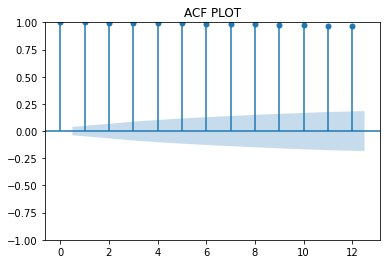

In [33]:
plt.figure(figsize=(25,18))
tsa_plots.plot_acf(Residuals1, lags = 12)
plt.title("ACF PLOT")
plt.show()

Plotting the PACF plot. 

C:\Users\lenny\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1080x576 with 0 Axes>

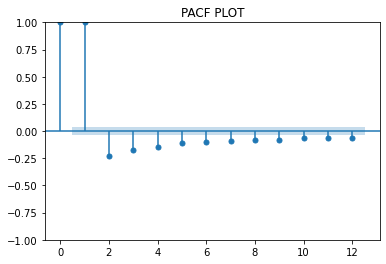

In [34]:
plt.figure(figsize=(15,8))
tsa_plots.plot_pacf(Residuals1, lags = 12)
plt.title("PACF PLOT")
plt.show()

From the acf and pacf plot we can see that lag1 is the best option. 

Importing the library required to build the AR model.

In [35]:
from statsmodels.tsa.ar_model import AutoReg

Building the model on the first set of residuals obtained from the Additive seasonality with Linear trend model. 

In [36]:
model_ar = AutoReg(Residuals1, lags=[1])

Fitting the model. 

In [37]:
model_fit = model_ar.fit()

Checking the coefficients of the model. 

In [38]:
print('Coefficients: %s' % model_fit.params)

Coefficients: const    0.003125
y.L1     0.999789
dtype: float64


### CONCLUSION

We tried using both linear and Additive seasonality linear trend but both are giving the same Beta1 function. 

Here we can see that the Beta1 function is almost equal to one which satisfies the Random walk condition. As we know random walk is unpredictable so a reasonable forecast is not possible. Therefore further steps are also not necessary and the forecasting is abandoned. 